# 목표

1. 적절한 supervised learning 찾기
 
 * Naive Bayes : 
  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import wordninja
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yah12\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yah12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 데이터 로드

In [3]:
train_data = pd.read_csv("Train_data")
test_data = pd.read_csv("Test_data")

In [4]:
train_data

,Game title,Url,Genre,Label
0,Ottoman Wars,LimonGame.OsmanliSavaslari,Strategy,16
1,SuperStar JYPNATION,dalcomsoft.ss.jyp,Music,3
2,Symmetry: Path to Perfection,platonicgames.symmetria,Puzzle,8
3,바이크 홉: BMX 라이더광이 되어라!,bike.hop.fall,Arcade,6
4,Pulling USA 2,bowengames.pullingusa2,Simulation,1
...,...,...,...,...
3896,SuperStar SMTOWN,kr.co.dalcomsoft.superstar.a,Music,3
3897,[VIP] 코인공주 : 도트 RPG,norizabob.coinprincessvip,Role Playing,11
3898,My City : Bank,mycity.bank,Educational,7
3899,The Bubble Shooter Story®,shooter.bubble.the,Casual,13


In [5]:
print('게임 개수 :', len(train_data))

게임 개수 : 3901


train_data의 수는 3901개이고, col은 Game title, Url, Genre, Labeling으로 구성되어 있습니다. Game title과 Genre는 사용 할 필요가 없으므로 무시합니다.

In [6]:
test_data

,Game title,Url,Genre,Label
0,My Pocket Galaxy - 3D Gravity Sandbox,uk.co.pocketlabs.pocketuniverse,Simulation,1
1,건쉽배틀: 헬리콥터 3D 액션,theonegames.gunshipbattle,Action,10
2,야구부 스토리,net.kairosoft.android.baseball_en,Sports,0
3,Kids Learn About Animals,net.cleverbit.LearnAnimalsEx,Educational,7
4,Car Parking Multiplayer,olzhas.carparking.multyplayer,Simulation,1
...,...,...,...,...
428,레전드 오브 미르2 블랙,kr.lom.google,Role Playing,11
429,Moonzy. Kids Mini-Games,PSVStudio.LuntikMinigames,Educational,7
430,Hotel Hideaway - 가상 현실 생활 시뮬레이터,piispanen.hotelhideaway,Role Playing,11
431,홈 디자인 꾸미기,in.loop.hdmakeover,Simulation,1


# 데이터 정제하기

크롤링 단계에서 중복된 내용은 제거했기 때문에 중복된 내용은 없습니다.

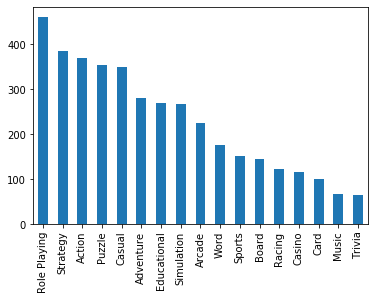

In [7]:
train_data['Genre'].value_counts().plot(kind = 'bar')

- 각 장르별 개수를 파악하니 개수가 매우 불균형합니다.
- 해결책
 1. 개수가 적은 장르 보충
 2. 개수가 적은 장르 제거

불균형을 해결하기 앞서 null값이 들어가 있는지 확인합니다.

In [8]:
print(train_data.isnull().values.any())

False


False가 나왔기 때문에 train_data에 null 값은 없습니다.

일단 데이터의 개수와 관계없이 데이터 전처리를 수행하겠습니다. Url을 보면 sundaytoz.kakao.anipang4와 같이 온점 등 각종 특수문자를 제거하는 작업을 합니다.

In [9]:
for i in range(len(train_data)):
    train_data['Url'][i] = text_to_word_sequence(train_data['Url'][i])

C:\Users\yah12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
for i in range(len(test_data)):
    test_data['Url'][i] = text_to_word_sequence(test_data['Url'][i])

C:\Users\yah12\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
train_data

,Game title,Url,Genre,Label
0,Ottoman Wars,"[limongame, osmanlisavaslari]",Strategy,16
1,SuperStar JYPNATION,"[dalcomsoft, ss, jyp]",Music,3
2,Symmetry: Path to Perfection,"[platonicgames, symmetria]",Puzzle,8
3,바이크 홉: BMX 라이더광이 되어라!,"[bike, hop, fall]",Arcade,6
4,Pulling USA 2,"[bowengames, pullingusa2]",Simulation,1
...,...,...,...,...
3896,SuperStar SMTOWN,"[kr, co, dalcomsoft, superstar, a]",Music,3
3897,[VIP] 코인공주 : 도트 RPG,"[norizabob, coinprincessvip]",Role Playing,11
3898,My City : Bank,"[mycity, bank]",Educational,7
3899,The Bubble Shooter Story®,"[shooter, bubble, the]",Casual,13


Tokenization을 통해 글자를 모두 소문자로 고치고, 특수 문자 제거 등의 과정을 수행했습니다. 이후 Url과 label만 따로 추출해 정수로 인코딩합니다.

In [12]:
imsi_X_train = train_data[['Url','Label']]

In [13]:
imsi_X_train

,Url,Label
0,"[limongame, osmanlisavaslari]",16
1,"[dalcomsoft, ss, jyp]",3
2,"[platonicgames, symmetria]",8
3,"[bike, hop, fall]",6
4,"[bowengames, pullingusa2]",1
...,...,...
3896,"[kr, co, dalcomsoft, superstar, a]",3
3897,"[norizabob, coinprincessvip]",11
3898,"[mycity, bank]",7
3899,"[shooter, bubble, the]",13


In [14]:
test_data

,Game title,Url,Genre,Label
0,My Pocket Galaxy - 3D Gravity Sandbox,"[uk, co, pocketlabs, pocketuniverse]",Simulation,1
1,건쉽배틀: 헬리콥터 3D 액션,"[theonegames, gunshipbattle]",Action,10
2,야구부 스토리,"[net, kairosoft, android, baseball, en]",Sports,0
3,Kids Learn About Animals,"[net, cleverbit, learnanimalsex]",Educational,7
4,Car Parking Multiplayer,"[olzhas, carparking, multyplayer]",Simulation,1
...,...,...,...,...
428,레전드 오브 미르2 블랙,"[kr, lom, google]",Role Playing,11
429,Moonzy. Kids Mini-Games,"[psvstudio, luntikminigames]",Educational,7
430,Hotel Hideaway - 가상 현실 생활 시뮬레이터,"[piispanen, hotelhideaway]",Role Playing,11
431,홈 디자인 꾸미기,"[in, loop, hdmakeover]",Simulation,1


In [15]:
imsi_X_test = test_data[['Url','Label']]

In [16]:
imsi_X_test

,Url,Label
0,"[uk, co, pocketlabs, pocketuniverse]",1
1,"[theonegames, gunshipbattle]",10
2,"[net, kairosoft, android, baseball, en]",0
3,"[net, cleverbit, learnanimalsex]",7
4,"[olzhas, carparking, multyplayer]",1
...,...,...
428,"[kr, lom, google]",11
429,"[psvstudio, luntikminigames]",7
430,"[piispanen, hotelhideaway]",11
431,"[in, loop, hdmakeover]",1


정수 인코딩 방법은 여러 가지가 있지만, 보통은 전처리 또는 빈도수가 높은 단어들만 사용하기 위해서 단어에 대한 빈도수를 기준으로 정렬한 뒤 부여합니다.

- 개인적인 생각으론 각 url당 내용이 너무 달라 어떤 의미를 가질지 궁금함

정수 인코딩에 앞서 각 단어들의 개수를 파악합니다.

In [17]:
vocab = {}
sentences = []

for i in range(len(imsi_X_train)):
    result = []
    for word in imsi_X_train['Url'][i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 198), ('com', 104), ('air', 104), ('game', 101), ('free', 99), ('games', 93), ('google', 80), ('sinyee', 64), ('babybus', 64), ('net', 61), ('co', 53), ('gp', 49), ('googleplay', 47), ('puzzle', 47), ('jp', 47), ('kr', 41), ('gameloft', 34), ('anmp', 34), ('budgestudios', 31), ('cocoplay', 29), ('en', 28), ('global', 28), ('word', 28), ('app', 26), ('solitaire', 26), ('mytown', 25), ('se', 24), ('and', 24), ('square', 23), ('enix', 22), ('mobile', 22), ('bubble', 21), ('hg', 20), ('bitmango', 20), ('go', 19), ('org', 19), ('kids', 18), ('herocraft', 18), ('flipline', 18), ('netmarble', 18), ('shooter', 17), ('kairosoft', 17), ('mobirix', 16), ('king', 16), ('mycity', 16), ('ea', 16), ('br', 15), ('wb', 15), ('music', 15), ('io', 14), ('tapps', 14), ('bandainamcoent', 14), ('crossword', 14), ('noodlecake', 13), ('crazylabs', 13), ('my', 13), ('goog', 13), ('easytech', 13), ('premium', 13), ('igg', 13), ('bubadu', 13), ('coloring', 12), ('survival', 12), ('de', 12), ('aos', 

android, google, net 등 구글 플레이스토어를 나타내는 일반적인 단어나 회사 명이 가장 많이 중복됐습니다. 이 외에 puzzle과 같은 의미있는 데이터도 확인할 수 있었습니다.

-  더 수정해야 할 내용
 1. bigfishgames와 같이 여러 의미를 가진 말을 big + fish + game으로 나누고 싶습니다.
 2. stemming을 통해 game과 games 를 같은 단어로 보게 만듭니다.

# 1. 공백이 없는 문장을 토큰화

ex) bigfishgames -> 'big', 'fish', 'games'

In [18]:
train_data_imsi = pd.read_csv("Train_data")

In [19]:
ddf = re.sub(r'[^a-zA-Z ]', '', train_data_imsi['Url'][0])

In [20]:
ddf

'LimonGameOsmanliSavaslari'

In [21]:
text_to_word_sequence(ddf)

['limongameosmanlisavaslari']

In [22]:
word_tokenize(ddf)
#WordPunctTokenizer().tokenize(ddf)

['LimonGameOsmanliSavaslari']

온점을 제거한 상태에서 sunday, kakao, anipang과 같이 추출해주는 라이브러리가 없는지 keras와 nltk의 다양한 토큰화 라이브러리를 이용해 확인해 보았습니다. 위와 같이 온점이 제거되고, 공백이 없는 url에서 토큰화를 할 방법은 없을까?

In [23]:
wordninja.split('sundaytozkakaoanipang')

['sunday', 'to', 'z', 'ka', 'kao', 'ani', 'pang']

In [24]:
wordninja.split('pixelbite')

['pixel', 'bite']

In [25]:
wordninja.split('netmable')

['net', 'mable']

In [26]:
wordninja.split('playgendary')

['play', 'g', 'end', 'ary']

In [27]:
wordninja.split('bigfishman')

['big', 'fish', 'man']

wordninja라는 라이브러리를 이용해보니 bigfishgame과 명확한 의미를 가진 단어는 잘 분류하지만, 사용자가 임의로 만든 내용에 대해선 분리를 잘 못합니다. netmable과 같은 게임 이름은 하나로 통일하고싶고, bigfishman은 나누고 싶은데 어떻게 할까? -> 일단은 분리 하지 말고 실행

# 2. Stemming

games, game과 같은 내용들을 통일하기 위해 stemming을 적용합니다.

In [28]:
#for i in range(len(train_data)):
#    train_data['Url'][i] = text_to_word_sequence(train_data['Url'][i])

In [29]:
s = PorterStemmer()
x_train = []
x_test = []

for i in range(len(train_data)):
    x_train.append([s.stem(w) for w in train_data['Url'][i]])

for i in range(len(test_data)):
    x_test.append([s.stem(w) for w in test_data['Url'][i]])


In [30]:
x_train

[['limongam', 'osmanlisavaslari'],
 ['dalcomsoft', 'ss', 'jyp'],
 ['platonicgam', 'symmetria'],
 ['bike', 'hop', 'fall'],
 ['bowengam', 'pullingusa2'],
 ['generagam', 'resist'],
 ['brainium', 'freecel'],
 ['tuningmania', 'illegalracetun'],
 ['totalbattl'],
 ['tencent', 'mxylzko', 'android'],
 ['riotgam', 'leagu', 'teamfighttact'],
 ['gamestart', 'zen'],
 ['squar', 'enix', 'android', 'googleplay', 'ffiii', 'gp'],
 ['superclay', 'vipfreecashknight'],
 ['boomwar', 'cafepan'],
 ['logo', 'quiz', 'compani', 'game'],
 ['devolv', 'reign'],
 ['com2u', 'smon', 'normal', 'freeful', 'googl', 'kr', 'android', 'common'],
 ['turborocketgam', 'wildcraft'],
 ['gun', 'black', 'op'],
 ['bearfac', 'game', 'merchant'],
 ['tapblaz', 'pizzabusi'],
 ['gameinsight', 'gobandroid'],
 ['claru', 'egyptful'],
 ['feelingtouch', 'es'],
 ['drpanda', 'train'],
 ['idsp', 'tanks2'],
 ['majorariatto', 'golfingoverit'],
 ['wooga', 'pearlsperil'],
 ['mapp', 'tienlen', 'miennam'],
 ['miniclip', 'bowmast'],
 ['omgpop', 'dstfr

In [31]:
x_test

[['uk', 'co', 'pocketlab', 'pocketunivers'],
 ['theonegam', 'gunshipbattl'],
 ['net', 'kairosoft', 'android', 'basebal', 'en'],
 ['net', 'cleverbit', 'learnanimalsex'],
 ['olzha', 'carpark', 'multyplay'],
 ['nexon', 'sinoalic'],
 ['sp', 'app', 'bubblepop'],
 ['stefmorojna', 'spaceflightsimul'],
 ['ivanpanasenko', 'endurancepremium'],
 ['miniclip', 'archeri'],
 ['it', 'rorto', 'realflightsimul'],
 ['pramot', 'hilohd'],
 ['deemedyainc', 'duel'],
 ['acevir', 'angrygranrun'],
 ['dirgtrat', 'endlessatc'],
 ['zynga', 'words3'],
 ['gamefirst', 'religioninc'],
 ['champion', 'bubbl'],
 ['zutgam', 'ilovehu'],
 ['wildwork', 'ryanstag'],
 ['budgestudio', 'googleplay', 'mylittleponycolor'],
 ['ezjoynetwork', 'bubblebirdrescue2'],
 ['codigam', 'idl', 'prison', 'empir', 'manag', 'tycoon'],
 ['myciti', 'highschool'],
 ['episodeinteract', 'android', 'catalog'],
 ['mageek', 'android', 'trucksimulatorpro2016'],
 ['coffeestainstudio', 'goatsimul', 'mmo'],
 ['ru', 'crazypanda', 'mmostrategi'],
 ['tap4fun',

In [32]:
vocab = {}
sentences = []

for i in range(len(x_train)):
    result = []
    for word in x_train[i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 198), ('game', 194), ('com', 104), ('air', 104), ('free', 99), ('googl', 80), ('sinye', 64), ('babybu', 64), ('net', 61), ('co', 53), ('gp', 50), ('puzzl', 49), ('googleplay', 47), ('jp', 47), ('kr', 41), ('app', 35), ('gameloft', 34), ('anmp', 34), ('word', 33), ('budgestudio', 31), ('cocoplay', 29), ('color', 28), ('en', 28), ('bubbl', 28), ('global', 28), ('solitair', 27), ('mytown', 25), ('se', 24), ('and', 24), ('squar', 23), ('enix', 22), ('mobil', 22), ('hg', 20), ('bitmango', 20), ('go', 19), ('org', 19), ('kid', 18), ('herocraft', 18), ('fliplin', 18), ('netmarbl', 18), ('shooter', 17), ('kairosoft', 17), ('crossword', 17), ('mobirix', 16), ('king', 16), ('block', 16), ('myciti', 16), ('music', 16), ('ea', 16), ('br', 15), ('wb', 15), ('io', 14), ('tapp', 14), ('hero', 14), ('bandainamco', 14), ('noodlecak', 13), ('crazylab', 13), ('surviv', 13), ('my', 13), ('goog', 13), ('easytech', 13), ('premium', 13), ('igg', 13), ('bubadu', 13), ('adventur', 12), ('de', 12),

google -> googl, netmable -> netmabl과 같이 e가 사라지는 경우가 있지만, games와 game을 모두 game으로 보는 등 일반화가 잘 되었습니다. 하지만 ('g', 3)과 같이 전혀 의미 없는 단어나 of, by등과 같은 조사를 없애기 위해 관련 단어들은 제거하겠습니다.

# 3. 불용어 제거

In [33]:
stop_words = set(stopwords.words('english'))
X_train = []
X_test = []
for i in range(len(x_train)):
    imsi_list = []
    for w in x_train[i]:
        if w not in stop_words:
            imsi_list.append(w)
    X_train.append(imsi_list)
    
    
for i in range(len(x_test)):
    imsi_list = []
    for w in x_test[i]:
        if w not in stop_words:
            imsi_list.append(w)
    X_test.append(imsi_list)


In [34]:
X_train

[['limongam', 'osmanlisavaslari'],
 ['dalcomsoft', 'ss', 'jyp'],
 ['platonicgam', 'symmetria'],
 ['bike', 'hop', 'fall'],
 ['bowengam', 'pullingusa2'],
 ['generagam', 'resist'],
 ['brainium', 'freecel'],
 ['tuningmania', 'illegalracetun'],
 ['totalbattl'],
 ['tencent', 'mxylzko', 'android'],
 ['riotgam', 'leagu', 'teamfighttact'],
 ['gamestart', 'zen'],
 ['squar', 'enix', 'android', 'googleplay', 'ffiii', 'gp'],
 ['superclay', 'vipfreecashknight'],
 ['boomwar', 'cafepan'],
 ['logo', 'quiz', 'compani', 'game'],
 ['devolv', 'reign'],
 ['com2u', 'smon', 'normal', 'freeful', 'googl', 'kr', 'android', 'common'],
 ['turborocketgam', 'wildcraft'],
 ['gun', 'black', 'op'],
 ['bearfac', 'game', 'merchant'],
 ['tapblaz', 'pizzabusi'],
 ['gameinsight', 'gobandroid'],
 ['claru', 'egyptful'],
 ['feelingtouch', 'es'],
 ['drpanda', 'train'],
 ['idsp', 'tanks2'],
 ['majorariatto', 'golfingoverit'],
 ['wooga', 'pearlsperil'],
 ['mapp', 'tienlen', 'miennam'],
 ['miniclip', 'bowmast'],
 ['omgpop', 'dstfr

In [35]:
X_test

[['uk', 'co', 'pocketlab', 'pocketunivers'],
 ['theonegam', 'gunshipbattl'],
 ['net', 'kairosoft', 'android', 'basebal', 'en'],
 ['net', 'cleverbit', 'learnanimalsex'],
 ['olzha', 'carpark', 'multyplay'],
 ['nexon', 'sinoalic'],
 ['sp', 'app', 'bubblepop'],
 ['stefmorojna', 'spaceflightsimul'],
 ['ivanpanasenko', 'endurancepremium'],
 ['miniclip', 'archeri'],
 ['rorto', 'realflightsimul'],
 ['pramot', 'hilohd'],
 ['deemedyainc', 'duel'],
 ['acevir', 'angrygranrun'],
 ['dirgtrat', 'endlessatc'],
 ['zynga', 'words3'],
 ['gamefirst', 'religioninc'],
 ['champion', 'bubbl'],
 ['zutgam', 'ilovehu'],
 ['wildwork', 'ryanstag'],
 ['budgestudio', 'googleplay', 'mylittleponycolor'],
 ['ezjoynetwork', 'bubblebirdrescue2'],
 ['codigam', 'idl', 'prison', 'empir', 'manag', 'tycoon'],
 ['myciti', 'highschool'],
 ['episodeinteract', 'android', 'catalog'],
 ['mageek', 'android', 'trucksimulatorpro2016'],
 ['coffeestainstudio', 'goatsimul', 'mmo'],
 ['ru', 'crazypanda', 'mmostrategi'],
 ['tap4fun', 'brut

In [36]:
vocab = {}
sentences = []

for i in range(len(X_train)):
    result = []
    for word in X_train[i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 198), ('game', 194), ('com', 104), ('air', 104), ('free', 99), ('googl', 80), ('sinye', 64), ('babybu', 64), ('net', 61), ('co', 53), ('gp', 50), ('puzzl', 49), ('googleplay', 47), ('jp', 47), ('kr', 41), ('app', 35), ('gameloft', 34), ('anmp', 34), ('word', 33), ('budgestudio', 31), ('cocoplay', 29), ('color', 28), ('en', 28), ('bubbl', 28), ('global', 28), ('solitair', 27), ('mytown', 25), ('se', 24), ('squar', 23), ('enix', 22), ('mobil', 22), ('hg', 20), ('bitmango', 20), ('go', 19), ('org', 19), ('kid', 18), ('herocraft', 18), ('fliplin', 18), ('netmarbl', 18), ('shooter', 17), ('kairosoft', 17), ('crossword', 17), ('mobirix', 16), ('king', 16), ('block', 16), ('myciti', 16), ('music', 16), ('ea', 16), ('br', 15), ('wb', 15), ('io', 14), ('tapp', 14), ('hero', 14), ('bandainamco', 14), ('noodlecak', 13), ('crazylab', 13), ('surviv', 13), ('goog', 13), ('easytech', 13), ('premium', 13), ('igg', 13), ('bubadu', 13), ('adventur', 12), ('de', 12), ('ao', 12), ('row', 12),

# 4. 글자수 적은 것 제거

kr, jp, gf 등 의미는 존재하지만 (korea, japan 등) 2글자인 단어들도 제거해 주겠습니다.

In [37]:
del x_train
del x_test

In [38]:
shortword = re.compile(r'\W*\b\w{1,2}\b')
x_train = []
x_test = []


for i in range(len(X_train)):
    imsi_list = []
    
    # 2글자 이하 제거
    for w in X_train[i]:
        imsi_list.append(shortword.sub('',w))
    
    # '' 제거
    if '' in imsi_list:
        imsi_list.remove('')
    
    # remove 같은 경우 한 번 수행시 하나만 제거 그래서 최대 횟수를 시행해야함
    if '' in imsi_list:
        imsi_list.remove('')
    
    if '' in imsi_list:
        imsi_list.remove('')
    
    x_train.append(imsi_list)

for i in range(len(X_test)):
    imsi_list = []
    
    # 2글자 이하 제거
    for w in X_test[i]:
        imsi_list.append(shortword.sub('',w))
    
    # '' 제거
    if '' in imsi_list:
        imsi_list.remove('')
    
    # remove 같은 경우 한 번 수행시 하나만 제거 그래서 최대 횟수를 시행해야함
    if '' in imsi_list:
        imsi_list.remove('')
    
    if '' in imsi_list:
        imsi_list.remove('')
    
    x_test.append(imsi_list)

In [39]:
x_train

[['limongam', 'osmanlisavaslari'],
 ['dalcomsoft', 'jyp'],
 ['platonicgam', 'symmetria'],
 ['bike', 'hop', 'fall'],
 ['bowengam', 'pullingusa2'],
 ['generagam', 'resist'],
 ['brainium', 'freecel'],
 ['tuningmania', 'illegalracetun'],
 ['totalbattl'],
 ['tencent', 'mxylzko', 'android'],
 ['riotgam', 'leagu', 'teamfighttact'],
 ['gamestart', 'zen'],
 ['squar', 'enix', 'android', 'googleplay', 'ffiii'],
 ['superclay', 'vipfreecashknight'],
 ['boomwar', 'cafepan'],
 ['logo', 'quiz', 'compani', 'game'],
 ['devolv', 'reign'],
 ['com2u', 'smon', 'normal', 'freeful', 'googl', 'android', 'common'],
 ['turborocketgam', 'wildcraft'],
 ['gun', 'black'],
 ['bearfac', 'game', 'merchant'],
 ['tapblaz', 'pizzabusi'],
 ['gameinsight', 'gobandroid'],
 ['claru', 'egyptful'],
 ['feelingtouch'],
 ['drpanda', 'train'],
 ['idsp', 'tanks2'],
 ['majorariatto', 'golfingoverit'],
 ['wooga', 'pearlsperil'],
 ['mapp', 'tienlen', 'miennam'],
 ['miniclip', 'bowmast'],
 ['omgpop', 'dstfree'],
 ['bcnw'],
 ['dalcomsoft

In [40]:
x_test

[['pocketlab', 'pocketunivers'],
 ['theonegam', 'gunshipbattl'],
 ['net', 'kairosoft', 'android', 'basebal'],
 ['net', 'cleverbit', 'learnanimalsex'],
 ['olzha', 'carpark', 'multyplay'],
 ['nexon', 'sinoalic'],
 ['app', 'bubblepop'],
 ['stefmorojna', 'spaceflightsimul'],
 ['ivanpanasenko', 'endurancepremium'],
 ['miniclip', 'archeri'],
 ['rorto', 'realflightsimul'],
 ['pramot', 'hilohd'],
 ['deemedyainc', 'duel'],
 ['acevir', 'angrygranrun'],
 ['dirgtrat', 'endlessatc'],
 ['zynga', 'words3'],
 ['gamefirst', 'religioninc'],
 ['champion', 'bubbl'],
 ['zutgam', 'ilovehu'],
 ['wildwork', 'ryanstag'],
 ['budgestudio', 'googleplay', 'mylittleponycolor'],
 ['ezjoynetwork', 'bubblebirdrescue2'],
 ['codigam', 'idl', 'prison', 'empir', 'manag', 'tycoon'],
 ['myciti', 'highschool'],
 ['episodeinteract', 'android', 'catalog'],
 ['mageek', 'android', 'trucksimulatorpro2016'],
 ['coffeestainstudio', 'goatsimul', 'mmo'],
 ['crazypanda', 'mmostrategi'],
 ['tap4fun', 'brutalag', 'test'],
 ['foursakenme

In [41]:
vocab = {}
sentences = []

for i in range(len(x_train)):
    result = []
    for word in x_train[i]:
        if word not in vocab:
            vocab[word] = 0
        vocab[word] += 1
    sentences.append(result)

vocab_sort = sorted(vocab.items(), key = lambda x: x[1], reverse = True)
print(vocab_sort)

[('android', 198), ('game', 194), ('com', 104), ('air', 104), ('free', 99), ('googl', 80), ('sinye', 64), ('babybu', 64), ('net', 61), ('puzzl', 49), ('googleplay', 47), ('app', 35), ('gameloft', 34), ('anmp', 34), ('word', 33), ('budgestudio', 31), ('cocoplay', 29), ('color', 28), ('bubbl', 28), ('global', 28), ('solitair', 27), ('mytown', 25), ('squar', 23), ('enix', 22), ('mobil', 22), ('bitmango', 20), ('org', 19), ('kid', 18), ('herocraft', 18), ('fliplin', 18), ('netmarbl', 18), ('shooter', 17), ('kairosoft', 17), ('crossword', 17), ('mobirix', 16), ('king', 16), ('block', 16), ('myciti', 16), ('music', 16), ('tapp', 14), ('hero', 14), ('bandainamco', 14), ('noodlecak', 13), ('crazylab', 13), ('surviv', 13), ('goog', 13), ('easytech', 13), ('premium', 13), ('igg', 13), ('bubadu', 13), ('adventur', 12), ('row', 12), ('outfit7', 12), ('classic', 12), ('jewel', 11), ('idl', 11), ('kakaogam', 11), ('tile', 11), ('slotmast', 11), ('farm', 11), ('stickman', 11), ('legend', 11), ('tutot

위에 정의된 글자들은 다음 정제 과정을 거침

- 불용어 제거
- 2글자 이하 제거
- 어간 추출(Stemming)


추가로 필요한 작업

- bigfishman -> big, fish, man과 같이 분리하기
- x_train에 하나만 존재 하는 단어들을 어떻게 처리할까? (보통은 단어의 빈도수가 적으면 제거)

일단은 단어 한 개 짜리를 제거하지 않고 작업을 진행해보자.

# 정수 인코딩

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터에 정수 인코딩을 수행합니다.

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [43]:
print(tokenizer.word_index)

{'android': 1, 'game': 2, 'com': 3, 'air': 4, 'free': 5, 'googl': 6, 'sinye': 7, 'babybu': 8, 'net': 9, 'puzzl': 10, 'googleplay': 11, 'app': 12, 'gameloft': 13, 'anmp': 14, 'word': 15, 'budgestudio': 16, 'cocoplay': 17, 'color': 18, 'bubbl': 19, 'global': 20, 'solitair': 21, 'mytown': 22, 'squar': 23, 'enix': 24, 'mobil': 25, 'bitmango': 26, 'org': 27, 'kid': 28, 'herocraft': 29, 'fliplin': 30, 'netmarbl': 31, 'shooter': 32, 'kairosoft': 33, 'crossword': 34, 'mobirix': 35, 'king': 36, 'block': 37, 'myciti': 38, 'music': 39, 'tapp': 40, 'hero': 41, 'bandainamco': 42, 'noodlecak': 43, 'crazylab': 44, 'surviv': 45, 'goog': 46, 'easytech': 47, 'premium': 48, 'igg': 49, 'bubadu': 50, 'adventur': 51, 'row': 52, 'outfit7': 53, 'classic': 54, 'jewel': 55, 'idl': 56, 'kakaogam': 57, 'tile': 58, 'slotmast': 59, 'farm': 60, 'stickman': 61, 'legend': 62, 'tutotoon': 63, 'com2u': 64, 'normal': 65, 'miniclip': 66, 'car': 67, 'pro': 68, 'kongreg': 69, 'shoot': 70, 'sudoku': 71, 'play': 72, 'connect'

등장 빈도수가 높은 순서대로 5701개의 단어에 정수를 부여했습니다. 빈도수가 적은 단어들이 데이터에 얼마만큼의 비중을 차지하는지 확인하겠습니다.

In [44]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5701
등장 빈도가 2번 이하인 희귀 단어의 수: 5177
단어 집합에서 희귀 단어의 비율: 90.8086300649009
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 57.63281090983106


In [45]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5701
등장 빈도가 1번 이하인 희귀 단어의 수: 4691
단어 집합에서 희귀 단어의 비율: 82.28380985791966
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 47.740687970690004


# 한 번 사용된 글자 제거

1번만 등장한 글자의 빈도 비율이 약 48%, 함부로 제거하긴 힘들지만 NLP_6에선 제거하지 않고 학습했기 때문에 여기선 제거

In [46]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1012


In [47]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [48]:
x_train[:5]

[[1, 1], [349, 1], [526, 1], [263, 1, 1], [190, 1]]

In [49]:
x_test[:5]

[[1, 1], [1, 1], [10, 34, 2, 1], [10, 104, 1], [1, 1, 1]]

단어집합에 없는 단어인 OOV는 1로 나타내기 때문에, 기존 tokenizer.word_index에서 1을 더해줘야 합니다. ex) 'sundaytoz', 'kakao', 'anipang4'는 16, 21, 205이지만, 1을 OOV로 취급하기 때문에 17, 22, 206으로 나타냅니다.

상위 5개만 출력해보면, 각 단어에 대한 정수로 변환된 것을 확인할 수 있습니다.

In [50]:
y_train = np.array(train_data['Label'])
y_test = np.array(test_data['Label'])

정수 인코딩 단계에서 빈도수가 적은 단어를 제거했다면, 그 내용은 공백이되어 empty sample이 됩니다. 그것을 제거해 줘야 하지만, 빈도수 적은 단어를 제거하지 않았기 때문에 그냥 넙어갑니다.

# Empty sample 제거

빈도수가 1개인 글자는 모두 제거로 발생한 공백을 제거합니다.

In [51]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [52]:
# 빈 샘플들을 제거
X_train = np.delete(x_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

3901
3901


모두 빈 공간이 없어 sample의 수는 줄지 않았습니다.

# 패딩

서로 다른 길이의 샘플들의 길이를 동일하게 맞춰줍니다. 먼저 각 샘플들의 길이 분포를 확인하고, 어떻게 할 지 결정하겠습니다.

리뷰의 최대 길이 : 16
리뷰의 평균 길이 : 2.5188413227377597


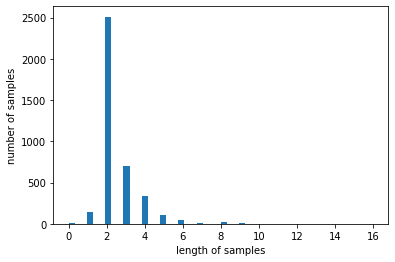

In [53]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

3901개의 sample의 평균 길이는 2.51입니다. 이제 모델이 처리할 수 있도록, x_train과 x_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춰줄 필요가 있습니다. 특정 길이 변수를 max_len으로 정하는데, 최적의 max_len을 찾아야 합니다. 위 그래프를 봤을 때 max_len의 길이는 5가 적당할 것 같습니다.

In [54]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [55]:
max_len = 5
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 5 이하인 샘플의 비율: 97.66726480389643


5이하인 비율이 97%이니 모든 샘플의 길이를 5로 맞추겠습니다.

In [56]:
x_train = pad_sequences(x_train, maxlen = max_len)

In [57]:
x_train

array([[  0,   0,   0,   1,   1],
       [  0,   0,   0, 349,   1],
       [  0,   0,   0, 526,   1],
       ...,
       [  0,   0,   0,  39,   1],
       [  0,   0,   0,  33,  20],
       [  0,   0,   0,  18,   1]])

In [58]:
x_test = pad_sequences(x_test, maxlen = max_len)

In [59]:
x_test

array([[  0,   0,   0,   1,   1],
       [  0,   0,   0,   1,   1],
       [  0,  10,  34,   2,   1],
       ...,
       [  0,   0,   0,   1,   1],
       [  0,   0,   0, 555,   1],
       [  0,   0,   1,  73,   1]])

In [60]:
# y_train의 개수 저장
len_y_train = len(y_train)

# y_test의 개수 저장
len_y_test = len(y_test)

y_train = list(y_train)
y_test = list(y_test)

y_train.extend(y_test)

In [61]:
imsi_y_train_test = pd.get_dummies(y_train)

In [62]:
imsi_y_train_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4330,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4331,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4332,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
y_train = imsi_y_train_test[:len_y_train]
y_test = imsi_y_train_test[len_y_train:]

In [64]:
y_train.shape

(3901, 17)

In [65]:
y_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3901,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3902,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3903,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3904,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3905,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4330,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4331,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4332,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
y_train = np.array(y_train)
y_test = np.array(y_test)

마지막으로 one_hot encoding을 사용해 다중 분류를 할 수 있도록 만들었습니다.

# LSTM으로 분류하기

LSTM을 이용해 분류를 시도합니다. 개인적인 생각으로는 

In [67]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [68]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(17, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [69]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3120 samples, validate on 781 samples
Epoch 1/15
2760/3120 [=========================>....] - ETA: 0s - loss: 2.7368 - acc: 0.1101
Epoch 00001: val_acc improved from -inf to 0.13316, saving model to best_model.h5
3120/3120 [==============================] - 1s 460us/sample - loss: 2.7311 - acc: 0.1131 - val_loss: 2.6915 - val_acc: 0.1332
Epoch 2/15
2940/3120 [===========================>..] - ETA: 0s - loss: 2.6439 - acc: 0.1425
Epoch 00002: val_acc improved from 0.13316 to 0.20999, saving model to best_model.h5
3120/3120 [==============================] - 1s 195us/sample - loss: 2.6377 - acc: 0.1468 - val_loss: 2.6002 - val_acc: 0.2100
Epoch 3/15
3000/3120 [===========================>..] - ETA: 0s - loss: 2.4775 - acc: 0.2120
Epoch 00003: val_acc improved from 0.20999 to 0.24456, saving model to best_model.h5
3120/3120 [==============================] - 1s 198us/sample - loss: 2.470

테스트 데이터에 대해서 평가

In [71]:
loss_and_metrics = model.evaluate(x_test,y_test, batch_size = 32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

433/433 [==============================] - 0s 122us/sample - loss: 2.1848 - acc: 0.3903

loss_and_metrics : [2.1847758172015395, 0.39030024]


약 39%의 정확도를 보입니다.

In [72]:
#xhat_idx = np.random.choice(x_test.shape[0], 5)
# x_test의 개수가 적으니 모두 확인해보자
xhat_idx = np.random.choice(x_test.shape[0], 20)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(len(xhat)):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

True : 12, Predict : 13
True : 10, Predict : 10
True : 2, Predict : 11
True : 8, Predict : 8
True : 1, Predict : 10
True : 16, Predict : 11
True : 11, Predict : 16
True : 13, Predict : 13
True : 13, Predict : 11
True : 6, Predict : 16
True : 0, Predict : 15
True : 8, Predict : 8
True : 16, Predict : 11
True : 13, Predict : 13
True : 16, Predict : 11
True : 8, Predict : 8
True : 8, Predict : 8
True : 12, Predict : 13
True : 8, Predict : 8
True : 7, Predict : 7


# 느낀 점

- 빈도수가 1회인 글자의 등장 횟수가 전체 등장 횟수의 약 48%를 차지하기 때문에 성능이 더 떨어짐
- 학습 데이터를 더 늘리기 어려우니 추가 정보를 넣자